# DATA 731 Stochastic Projet
Correlation study on satellite imagery maintaining the matrix.    
The objectif on this projet is to discover and have a first approach to the differents tools that are used on computer vision.   

## 0. init

In [1]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import  Normalize
from scipy.stats import stats

## 1. Data input

In [2]:
dataImages_landCover = []
imagesDate_landCover = [] 

dataImages_confidenceLevel = []
imagesDate_confidenceLevel = []

In [3]:
entries_landCover = os.listdir('FireCCI_LandCover_GEE/')
entries_confidenceLevel = os.listdir('FireCCI_ConfidenceLevel_GEE/')

for file_path in entries_landCover : 
    with rasterio.open(f"FireCCI_LandCover_GEE/{file_path}") as src:
        data = src.read(1)
        dateTmp = file_path.split(".")[1].split("_")
        date = f"{dateTmp[0]}/{dateTmp[1]}/{dateTmp[2]}"
        dataImages_landCover.append(data)
        imagesDate_landCover.append(date)

for file_path in entries_confidenceLevel : 
    with rasterio.open(f"FireCCI_ConfidenceLevel_GEE/{file_path}") as src:
        data = src.read(1)
        dateTmp = file_path.split(".")[1].split("_")
        date = f"{dateTmp[0]}/{dateTmp[1]}/{dateTmp[2]}"
        dataImages_confidenceLevel.append(data)
        imagesDate_confidenceLevel.append(date)

In [4]:
date_landCover = pd.to_datetime(imagesDate_landCover)
date_confidenceLevel = pd.to_datetime(imagesDate_confidenceLevel)

image_df_1 = pd.DataFrame({'date': date_landCover, 'data_landCover': dataImages_landCover})
image_df_2 = pd.DataFrame({'date': date_confidenceLevel, 'data_confidenceLevel': dataImages_confidenceLevel})

image_df = image_df_1.merge(image_df_2, on='date', how='inner')
image_df

,date,data_landCover,data_confidenceLevel
0,2015-01-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
1,2015-02-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
2,2015-03-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
3,2015-04-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
4,2015-05-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
...,...,...,...
67,2020-08-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
68,2020-09-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
69,2020-10-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 99, 98, 99, 100, 100, 99, 26, 71, 9..."
70,2020-11-01,"[[0, 0, 0, 0, 0, 0, 50, 50, 180, 0, 0, 0, 180,...","[[0, 0, 0, 96, 98, 99, 100, 100, 99, 26, 71, 9..."


## 2. Individual correlation
A correlation testfor an  individual image from 2020-10-01. In this test, I evaluated the function that I prepared, which measures various correlation values using a window size of 'n'; the window dimension is n x n. This function utilizes the Spearman correlationfunction from the SciPy stats library.     

We will not use the p value that is genereated with the spearman function.    
 
The function gives back a new matrix of the same size of the original images, containing the correlation values for each pixel.

In [5]:
def calculate_correlations_spearman(image1, image2, window_size=5):
    correlation_matrix = np.zeros_like(image1, dtype=float)

    half_window = window_size // 2

    for i in range(half_window, image1.shape[0] - half_window):
        for j in range(half_window, image1.shape[1] - half_window):
            window1 = image1[i - half_window : i + half_window + 1 , j - half_window : j + half_window + 1].flatten()
            window2 = image2[i - half_window : i + half_window + 1 , j - half_window : j + half_window + 1].flatten()

            correlation, _ = stats.spearmanr(window1, window2)
            correlation_matrix[i, j] = correlation

    return correlation_matrix

In [6]:
dataVisu_landCover = image_df.data_landCover[69]
dataVisu_confidenceLevel = image_df.data_confidenceLevel[69]

C:\Users\Carlos Andres Cortes\AppData\Local\Temp\ipykernel_1760\2019196762.py:11: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  correlation, _ = stats.spearmanr(window1, window2)
c:\Users\Carlos Andres Cortes\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


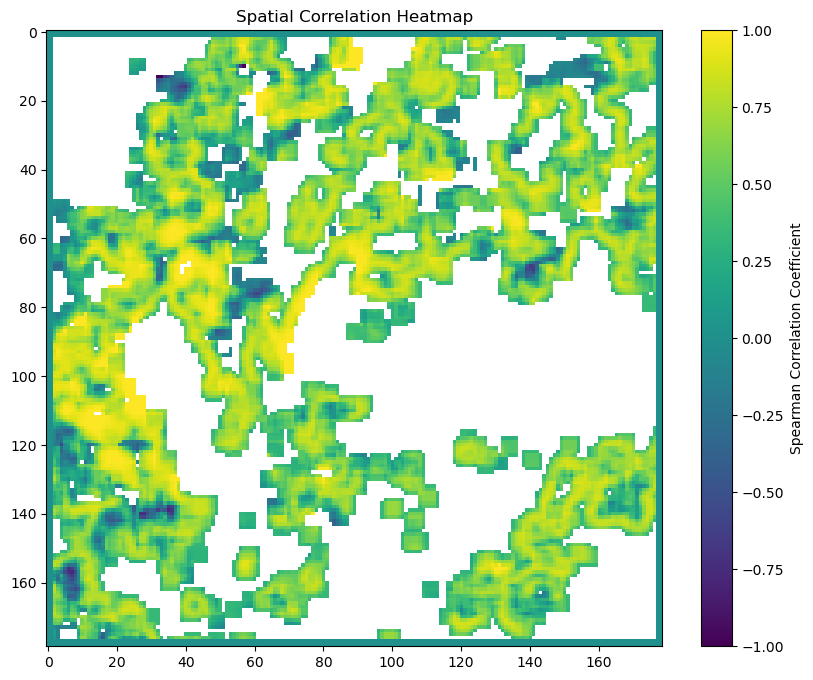

In [14]:
correlation_matrix = calculate_correlations_spearman(dataVisu_landCover, dataVisu_confidenceLevel, window_size=4)

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Spearman Correlation Coefficient')
plt.title('Spatial Correlation Heatmap')
plt.show()

## 3. Multiple Correlation

In [8]:
image_df['image_correlation'] = image_df.apply(lambda row: calculate_correlations_spearman(row['data_landCover'], row['data_confidenceLevel']), axis=1)

image_df

C:\Users\Carlos Andres Cortes\AppData\Local\Temp\ipykernel_1760\2019196762.py:11: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  correlation, _ = stats.spearmanr(window1, window2)


,date,data_landCover,data_confidenceLevel,image_correlation
0,2015-01-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,2015-02-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2015-03-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,2015-04-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,2015-05-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...
67,2020-08-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
68,2020-09-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
69,2020-10-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 99, 98, 99, 100, 100, 99, 26, 71, 9...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
70,2020-11-01,"[[0, 0, 0, 0, 0, 0, 50, 50, 180, 0, 0, 0, 180,...","[[0, 0, 0, 96, 98, 99, 100, 100, 99, 26, 71, 9...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


## 4. Results Analysis

### 4.1 Median and mean matrix of all the correlation matrix
To see the places where there is a higher correlation between the two images.   
We find two similar images with some places that the correlation  reaches a value of 1.
The white places correspond to the water bodies and rivers.    

In [ ]:
mean_matrix = np.nanmean(np.array(image_df["image_correlation"].tolist()), axis=0)
median_matrix = np.nanmedian(np.array(image_df["image_correlation"].tolist()), axis=0)

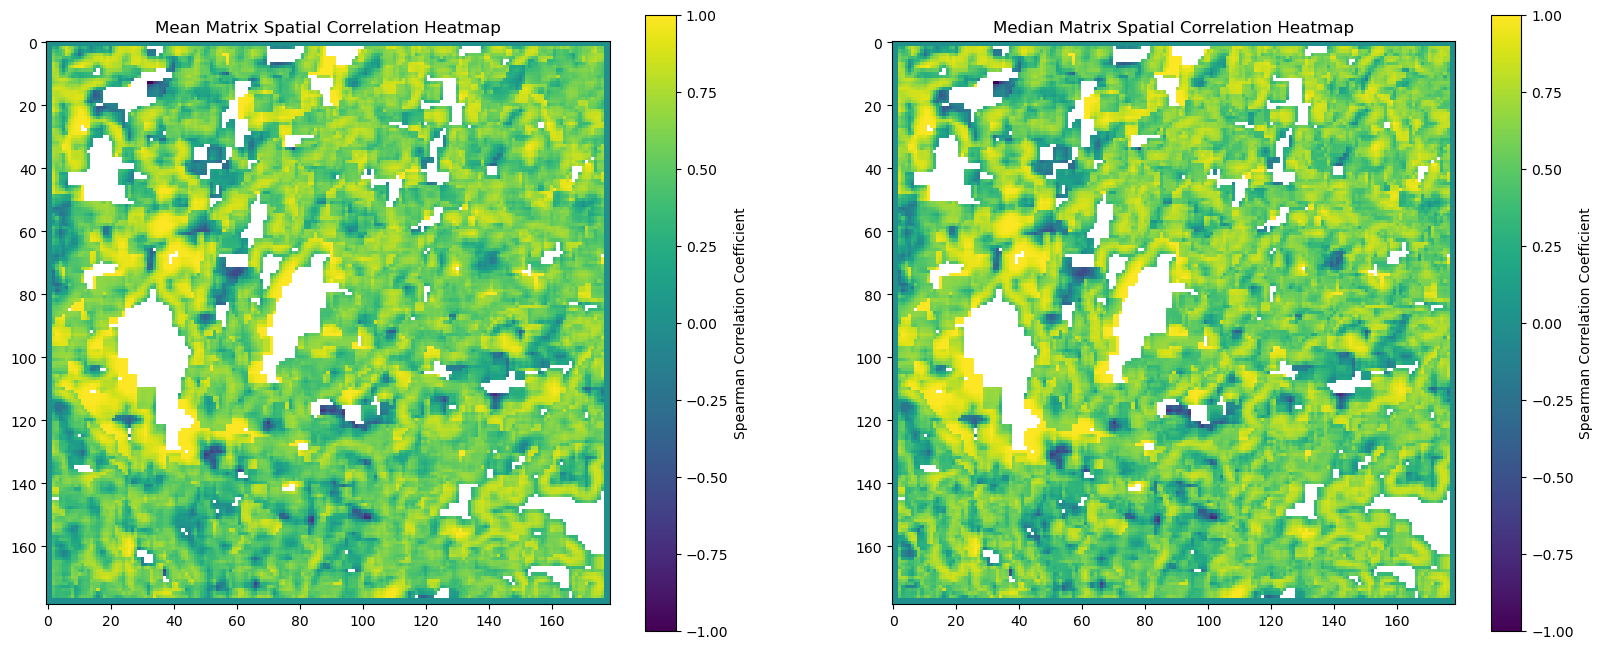

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))  

# Plotting the mean matrix
cax1 = ax1.imshow(mean_matrix, cmap='viridis', interpolation='nearest')
fig.colorbar(cax1, ax=ax1, label='Spearman Correlation Coefficient')
ax1.set_title('Mean Matrix Spatial Correlation Heatmap')

# Plotting the median matrix
cax2 = ax2.imshow(median_matrix, cmap='viridis', interpolation='nearest')
fig.colorbar(cax2, ax=ax2, label='Spearman Correlation Coefficient')
ax2.set_title('Median Matrix Spatial Correlation Heatmap')

plt.show()


### 4.2 Somme of correlation matrix
In this part i have added all the zones where there is a positive correlation (over 0.5) and all the zones where there is a negative correlation. Like this we can see the zones where the correlation is higher in all the dates.    

In [11]:
positive_count_matrix = np.zeros(image_df.image_correlation[0].shape)
negative_count_matrix = np.zeros(image_df.image_correlation[0].shape)

for matrix in image_df["image_correlation"]:
    matrix = np.array(matrix)
    
    positive_count_matrix += (matrix > 0.5)
    negative_count_matrix += (matrix < 0)

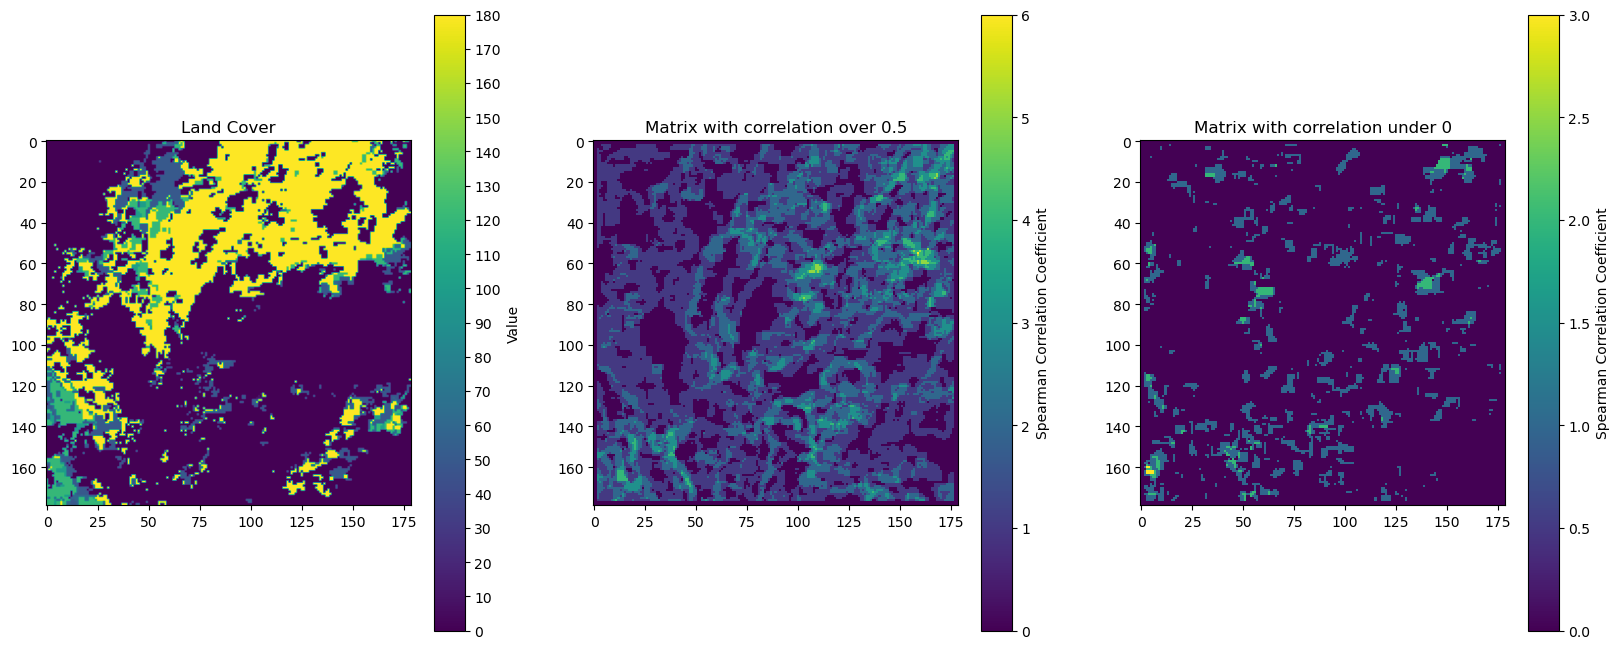

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

# Plotting the LandCover with the key bar from (0 to 180).
img_plot = ax1.imshow(image_df.data_landCover[69], cmap='viridis', norm=Normalize(vmin=0, vmax=180))
cbar = fig.colorbar(img_plot, ax=ax1)
cbar.set_label('Value')
cbar.set_ticks(np.arange(0, 181, 10))
cbar.set_ticklabels(np.arange(0, 181, 10))
ax1.set_title('Land Cover')

# Plotting the heatmap of the positive correlation.
cax1 = ax2.imshow(positive_count_matrix, cmap='viridis', interpolation='nearest')
fig.colorbar(cax1, ax=ax2, label='Spearman Correlation Coefficient') 
ax2.set_title('Matrix with correlation over 0.5') 

# Plotting the heatmap of the negative correlation. 
cax2 = ax3.imshow(negative_count_matrix, cmap='viridis', interpolation='nearest')
fig.colorbar(cax2, ax=ax3, label='Spearman Correlation Coefficient') 
ax3.set_title('Matrix with correlation under 0')

plt.show() 

* The left graph is the landCover with the values of the terrain (see the key in "EDA_suface_variation.ipynb").   
* The center graph represents the count of all correlation values greater than 0.5 across the entire dataset.
* The right graph shows the count of all correlation values less than 0, again spanning the entire dataset.

In this analysis, I observed interesting results:
the areas where a positive correlation is most frequently  are predominantly those with land cover values over 150. These areas are characterized by sparse vegetation, tree cover, and shrubs. Additionally, regions with a land cover value around 100, typically representing "Mosaic tree and shrub" areas, have also show a high frequency of positive correlations.    

We need to take into consideration that SciPy Spearman Function tends to give more negative correlation values that the custom made function, so probably a significance test with the p-values from this study could potentially refine and improve the findings.

### 4.3 Correlations matrices plots by date    
I noticed that correlation values only showed up in the more recent images. It might be a good idea to do a separate study just using the images from 2020.

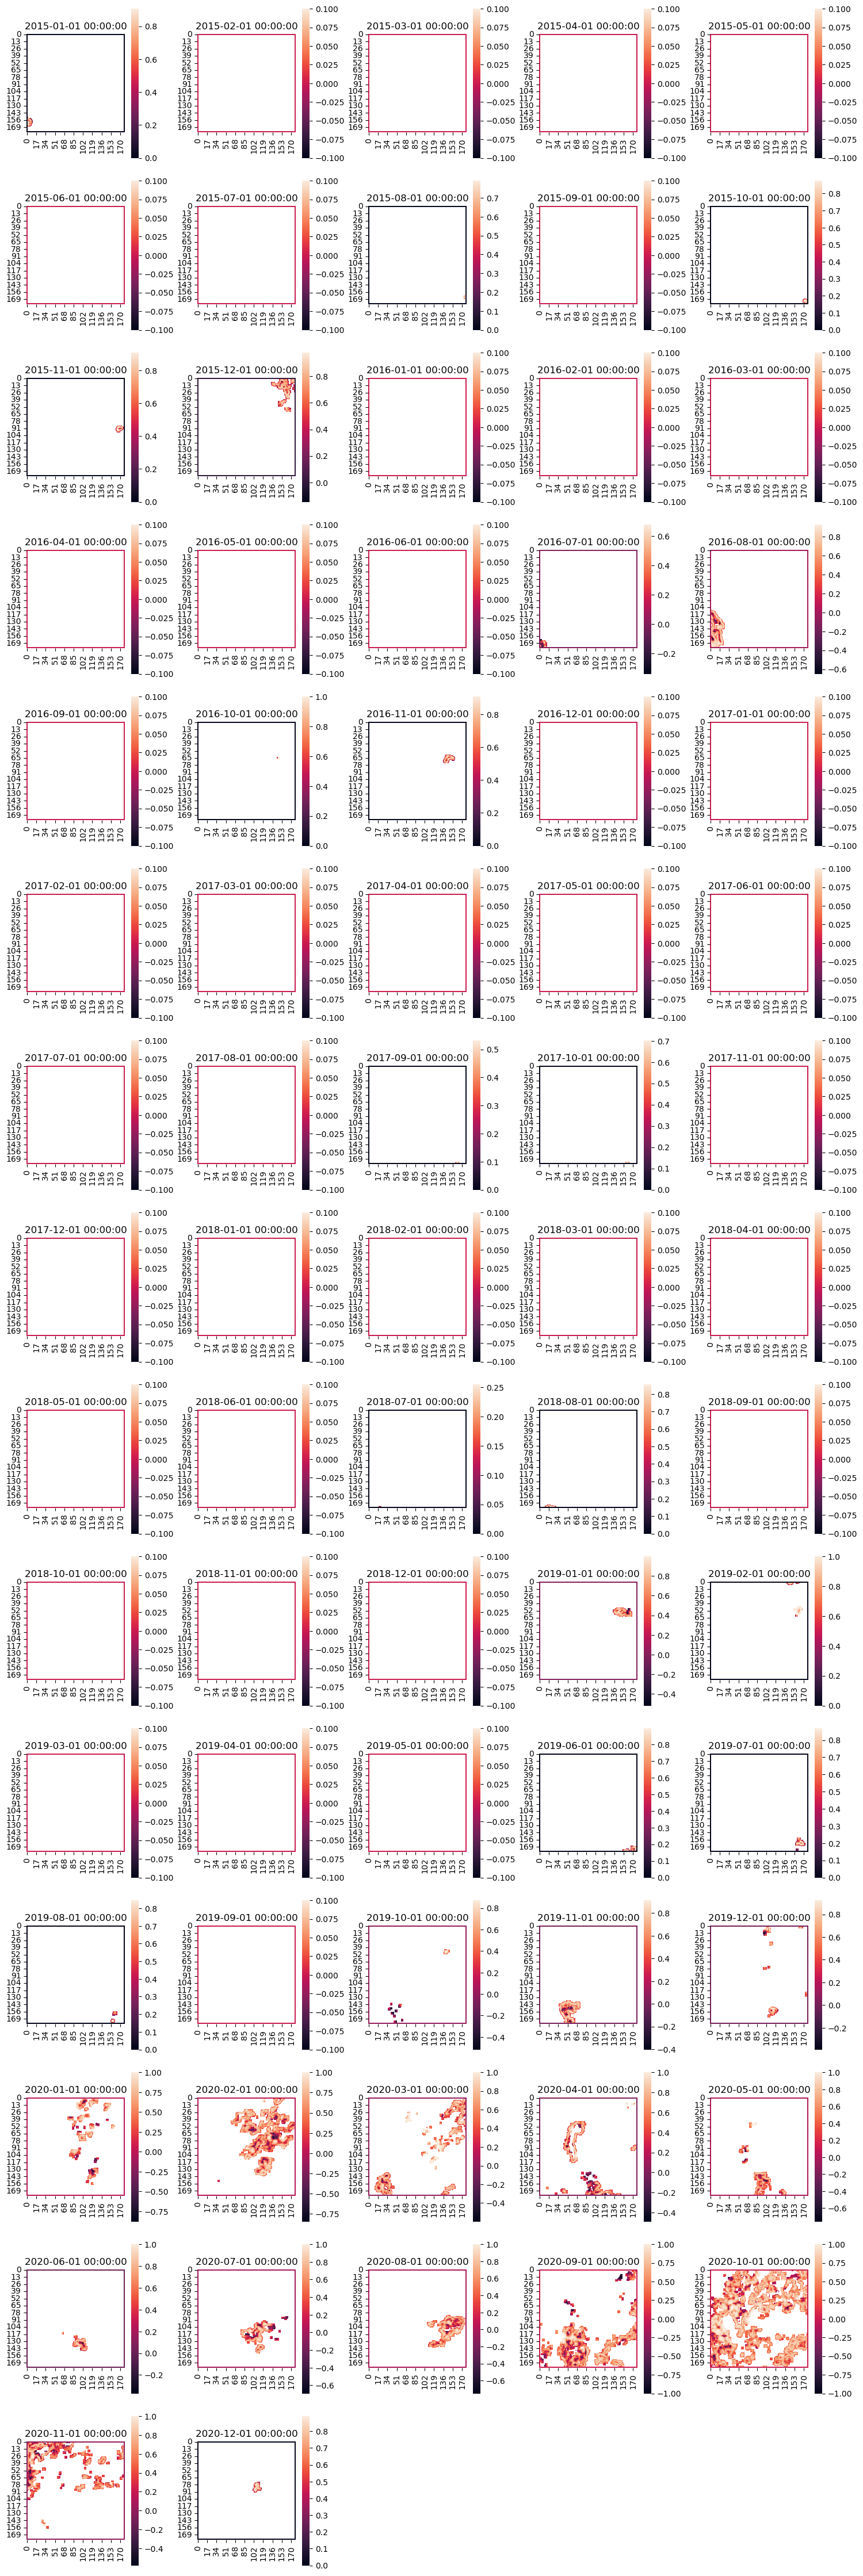

In [13]:
num_dates = len(image_df)
num_columns = 5
num_rows = (num_dates + num_columns - 1) // num_columns

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(3 * num_columns, 3 * num_rows))
axes = axes.flatten()

for i, (date, row) in enumerate(image_df.iterrows()):
    ax = axes[i]
    sns.heatmap(row['image_correlation'], ax=ax, square=True)
    ax.set_title(str(row['date']))

for j in range(i + 1, num_rows * num_columns):
    axes[j].axis('off')

plt.tight_layout()
plt.show()